In [1]:
!git clone https://github.com/Karan-Malik/FaceMaskDetector

Cloning into 'FaceMaskDetector'...
remote: Enumerating objects: 1543, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 1543 (delta 44), reused 71 (delta 30), pack-reused 1454
Receiving objects: 100% (1543/1543), 84.40 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [4]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
#from keras.optimizers import adam
from keras.preprocessing import image
import cv2
import datetime

In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [7]:
# BUILDING MODEL TO CLASSIFY BETWEEN MASK AND NO MASK

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory(
        '/content/FaceMaskDetector/train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

Found 1314 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
        '/content/FaceMaskDetector/test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 194 images belonging to 2 classes.


In [14]:
model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
83/83 [==============================] - 51s 602ms/step - loss: 0.3381 - accuracy: 0.8470 - val_loss: 0.1324 - val_accuracy: 0.9433
Epoch 2/10
83/83 [==============================] - 46s 551ms/step - loss: 0.1177 - accuracy: 0.9642 - val_loss: 0.0920 - val_accuracy: 0.9742
Epoch 3/10
83/83 [==============================] - 46s 557ms/step - loss: 0.1102 - accuracy: 0.9635 - val_loss: 0.0700 - val_accuracy: 0.9794
Epoch 4/10
83/83 [==============================] - 45s 543ms/step - loss: 0.0813 - accuracy: 0.9680 - val_loss: 0.0784 - val_accuracy: 0.9794
Epoch 5/10
83/83 [==============================] - 45s 536ms/step - loss: 0.0769 - accuracy: 0.9703 - val_loss: 0.0999 - val_accuracy: 0.9588
Epoch 6/10
83/83 [==============================] - 46s 550ms/step - loss: 0.0884 - accuracy: 0.9635 - val_loss: 0.1097 - val_accuracy: 0.9588
Epoch 7/10
83/83 [==============================] - 45s 538ms/step - loss: 0.0596 - accuracy: 0.9817 - val_loss: 0.0764 - val_accuracy: 0.9742

In [15]:
model.save('mymodel.h5',model_saved)

In [16]:
mymodel=load_model('mymodel.h5')

In [40]:
import cv2
import matplotlib.pyplot as plt

In [30]:
test_image=image.load_img('/content/withMask.jpeg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

With Mask


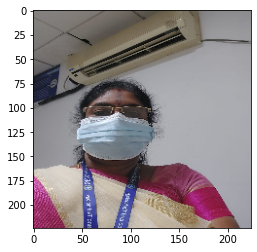

In [46]:
im = cv2.imread('/content/withMask.jpeg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
test_image=image.load_img('/content/WithoutMask.jpeg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

Without Mask


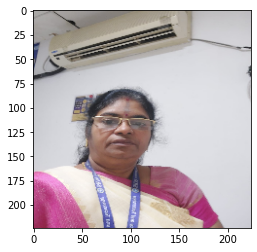

In [45]:
im = cv2.imread('/content/WithoutMask.jpeg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
# Open the device at the ID 0
#cap = cv2.VideoCapture(1)
# Check whether user selected camera is opened successfully.
#if not (cap.isOpened()):
  #print("Could not open video device")

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()